# Hola James!

Mi nombre es David Bautista, soy code reviewer de Tripleten y hoy tengo el gusto de revisar tu proyecto.

Cuando vea un error laa primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión.

Encontrarás mis comentarios más abajo - por favor, no los muevas, no los modifiques ni los borres.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

¡Empecemos!

<div class="alert alert-block alert-danger">
<b>Comentario del revisor </b> <a class="tocSkip"></a>
    
# Comentario General

~~Hola James, te felicito por el desarrollo del proyecto hasta el momento. Ahora bien, he dejado diferentes comentarios para que los puedas tener en cuenta, dentro de los cuales hay uno con el subtítulo **Comentario Importante**, el cual es determinante para que continuemos con la revisión del proyecto. Quedo atento para la siguiente entrega.~~ </div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>
    
# Comentario General #2

Hola James, te felicito por la culminación del proyecto. Muy buen trabajo. </div>


# Introducción al proyecto de toma de decisiones de negocios basadas en datos.

**Introducción al Proyecto: Priorización de Hipótesis y Análisis A/B**

En este proyecto, nos sumergimos en el mundo del análisis de datos para una tienda en línea con el objetivo de aumentar sus ingresos. Trabajaremos con dos conjuntos de datos: uno que contiene hipótesis sobre cómo mejorar los ingresos y otro que registra las transacciones y visitas de los usuarios durante un experimento A/B.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Perfecto, buen trabajo con esta sección de introducción. </div>

# PARTE I  Priorizar hipótesis

## Descarga y optimización de datos.

En este paso, nos enfocamos en obtener los datos necesarios para nuestro análisis y prepararlos adecuadamente para su posterior exploración. 

### Inicialización.

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Perfecto, buen trabajo importando las librerías necesarias para el desarrollo del proyecto. </div>

### Cargar datos.

In [2]:
# Cargar los datos.
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', delimiter=';')

In [3]:
# Mostrar las primeras filas de los datos de hipótesis
print("Datos de hipótesis:")
display(hypotheses.head(20))

Datos de hipótesis:


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo con la carga de los datos necesarios para el desarrollo del proyecto. </div>

### Calcular ICE para priorizar hipótesis

In [4]:
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
ice_sorted = hypotheses.sort_values(by='ICE', ascending=False)

# Mostrar hipótesis ordenadas por ICE
print("\nHipótesis ordenadas por ICE:")
print(ice_sorted[['Hypothesis', 'ICE']])


Hipótesis ordenadas por ICE:
                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


### Calcular RICE para priorizar hipótesis

In [5]:
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
rice_sorted = hypotheses.sort_values(by='RICE', ascending=False)

# Mostrar hipótesis ordenadas por RICE
print("\nHipótesis ordenadas por RICE:")
print(rice_sorted[['Hypothesis', 'RICE']])


Hipótesis ordenadas por RICE:
                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


In [6]:
# Concatenar las columnas relevantes de ICE y RICE para comparación
comparison_table = pd.concat([ice_sorted[['Hypothesis', 'ICE']], rice_sorted['RICE']], axis=1)

# Mostrar tabla de comparación
print("\nTabla de comparación entre ICE y RICE:")
print(comparison_table)


Tabla de comparación entre ICE y RICE:
                                          Hypothesis        ICE   RICE
0  Add two new channels for attracting traffic. T...  13.333333   40.0
1  Launch your own delivery service. This will sh...   2.000000    4.0
2  Add product recommendation blocks to the store...   7.000000   56.0
3  Change the category structure. This will incre...   1.125000    9.0
4  Change the background color on the main page. ...   1.000000    3.0
5  Add a customer review page. This will increase...   1.333333    4.0
6  Show banners with current offers and sales on ...   8.000000   40.0
7  Add a subscription form to all the main pages....  11.200000  112.0
8  Launch a promotion that gives users discounts ...  16.200000   16.2


Al comparar las listas de hipótesis ordenadas por ICE y RICE, podemos observar cómo cambia la priorización de las hipótesis. Es posible que algunas hipótesis con un alto alcance (Reach) pero menor impacto, confianza y esfuerzo, se prioricen más alto cuando se utiliza RICE en lugar de ICE. Esto se debe a que RICE toma en cuenta el alcance del usuario, lo que puede influir en la priorización de las hipótesis. Por lo tanto, es importante considerar el alcance del usuario al priorizar las hipótesis para asegurarse de enfocarse en aquellas que tienen un mayor potencial de impacto en un mayor número de usuarios.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
~~Excelente trabajo, James. Aplicas los frameworks RISE e ICE de manera correcta. Por otro lado, las conclusiones que generas son muy interesantes y relevantes. Lo único adicional que sería interesante de observar es poder tener una tabla donde, para cada hipótesis, logremos fácilmente comprar los valores de los dos frameworks.~~ </div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Buen trabajo James. </div>

## PARTE II Análisis de test A/B

### Cargar los datos

In [7]:
orders = pd.read_csv('/datasets/orders_us.csv')
visitors = pd.read_csv('/datasets/visits_us.csv')

### Convertir la columna de fecha a tipo datetime

In [8]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

# Visualizar las primeras filas de los datos
print("Datos de pedidos:")
print(orders.head())
print("\nDatos de visitantes:")
print(visitors.head())


Datos de pedidos:
   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     30.4     B
1     2804400009  3642806036 2019-08-15     15.2     B
2     2961555356  4069496402 2019-08-15     10.2     A
3     3797467345  1196621759 2019-08-15    155.1     B
4     2282983706  2322279887 2019-08-15     40.5     B

Datos de visitantes:
        date group  visits
0 2019-08-01     A     719
1 2019-08-02     A     619
2 2019-08-03     A     507
3 2019-08-04     A     717
4 2019-08-05     A     756


### Preprocesamiento de datos

In [9]:
# Identificar usuarios únicos en cada grupo
unique_users_group_A = orders[orders['group'] == 'A']['group'].unique()
unique_users_group_B = orders[orders['group'] == 'B']['group'].unique()

# Encontrar la intersección de usuarios entre ambos grupos
repeated_users = np.intersect1d(unique_users_group_A, unique_users_group_B)

# Eliminar las filas correspondientes a los usuarios repetidos en ambos grupos
orders_cleaned = orders[~orders['group'].isin(repeated_users)]
visitors_cleaned = visitors[~visitors['group'].isin(repeated_users)]

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con la carga y exploración de las otras dos tablas usadas para el desarrollo del proyecto. </div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
# **Comentario Importante**

~~Hay un aspecto importante que se debe tener en cuenta antes de desarrollar los siguientes ejercicios. James, fíjate que lo ideal sería lograr identificar qué usuarios están repetidos en los dos grupos y puedan ser eliminados, lo anterior con la ~~finalidad de obtener mejores conclusiones.~~

~~Ahora bien, he observado y los ejercicios los resuelves de muy buena manera, sin embargo, continuaremos la revisión de estos cuando se modifique lo anteriormente mencionado. Es importante que te puedas fijar cuáles de los ejercicios cambian con esta modificación~~ </div>

### Análisis exploratorio de datos

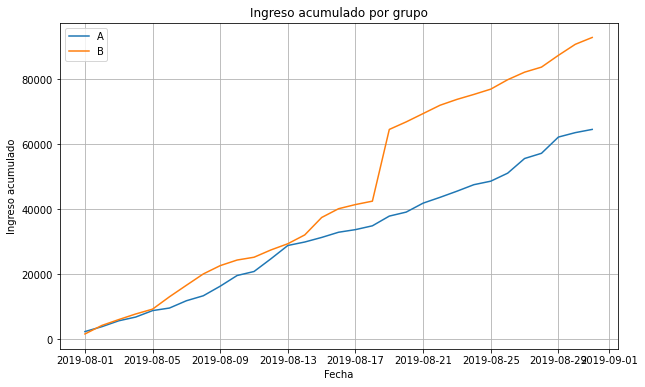

In [10]:
# Calcular el ingreso acumulado por grupo
cumulative_revenue = orders_cleaned.groupby(['date', 'group']).agg({'revenue': 'sum'}).groupby('group').cumsum().reset_index()

# Trazar el ingreso acumulado por grupo
plt.figure(figsize=(10, 6))
for group in cumulative_revenue['group'].unique():
    plt.plot(cumulative_revenue[cumulative_revenue['group'] == group]['date'], cumulative_revenue[cumulative_revenue['group'] == group]['revenue'], label=group)

plt.title('Ingreso acumulado por grupo')
plt.xlabel('Fecha')
plt.ylabel('Ingreso acumulado')
plt.legend()
plt.grid(True)
plt.show()

Notas:
- El grupo B muestra un aumento constante en el ingreso acumulado a lo largo del tiempo, superando al grupo A de manera significativa. 
- Esto sugiere que el grupo B puede estar experimentando un rendimiento superior en términos de ingresos en comparación con el grupo A durante el período analizado.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Perfecto, buen trabajo con el desarrollo del gráfico de los ingresos acumulados por grupo. </div>

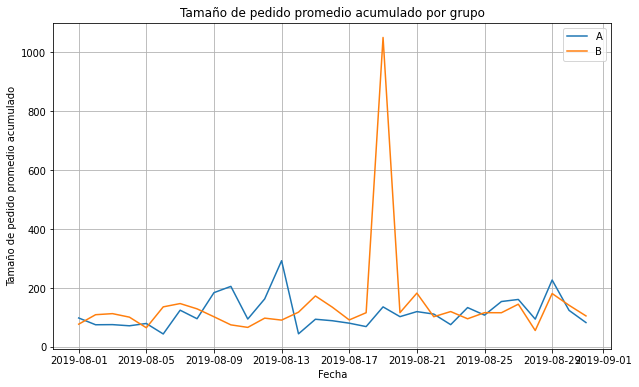

In [11]:
# Calcular el tamaño de pedido promedio acumulado por grupo
cumulative_avg_order_size = orders_cleaned.groupby(['date', 'group']).agg({'revenue': 'sum', 'transactionId': 'nunique'}).reset_index()
cumulative_avg_order_size['avg_order_size'] = cumulative_avg_order_size['revenue'] / cumulative_avg_order_size['transactionId']

# Trazar el tamaño de pedido promedio acumulado por grupo
plt.figure(figsize=(10, 6))
for group in cumulative_avg_order_size['group'].unique():
    group_data = cumulative_avg_order_size[cumulative_avg_order_size['group'] == group]
    plt.plot(group_data['date'], group_data['avg_order_size'], label=group)

plt.title('Tamaño de pedido promedio acumulado por grupo')
plt.xlabel('Fecha')
plt.ylabel('Tamaño de pedido promedio acumulado')
plt.legend()
plt.grid(True)
plt.show()

Notas:
- El grupo B muestra un tamaño de pedido promedio acumulado más alto en comparación con el grupo A a lo largo del período analizado.
- Esta diferencia sugiere que el grupo B puede estar generando pedidos de mayor valor promedio que el grupo A.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Buen trabajo con el desarrollo del gráfico del tamaño de pedido promedio acumulado por grupo. </div>

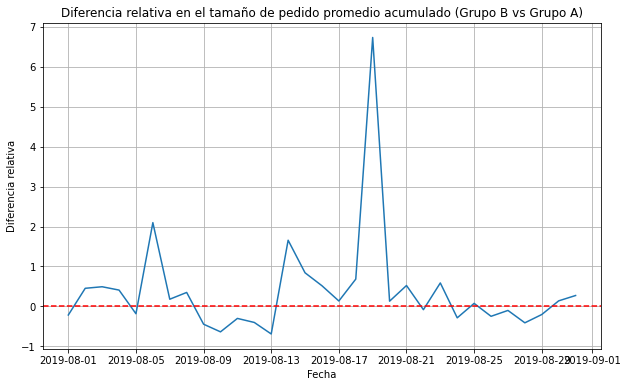

In [12]:
# Calcular la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A
merged_data = cumulative_avg_order_size.pivot(index='date', columns='group', values='avg_order_size')
merged_data['relative_difference'] = (merged_data['B'] / merged_data['A']) - 1

# Trazar la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A
plt.figure(figsize=(10, 6))
plt.plot(merged_data.index, merged_data['relative_difference'])
plt.title('Diferencia relativa en el tamaño de pedido promedio acumulado (Grupo B vs Grupo A)')
plt.xlabel('Fecha')
plt.ylabel('Diferencia relativa')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

Notas: 
- La diferencia relativa muestra picos y valles a lo largo del tiempo.
- En algunos días, el tamaño de pedido promedio en el grupo B supera significativamente al grupo A, mientras que en otros días es comparable o incluso menor.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Buen trabajo con el cálculo y gráfico de la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. </div>

In [13]:
# Calcular el número de pedidos por día y grupo
orders_per_day_group = orders_cleaned.groupby(['date', 'group']).agg({'transactionId': 'nunique'}).reset_index()
orders_per_day_group.columns = ['date', 'group', 'orders']

# Calcular el número de visitas por día y grupo
visits_per_day_group = visitors_cleaned.groupby(['date', 'group']).agg({'visits': 'sum'}).reset_index()

# Combinar datos de pedidos y visitas
conversion_data = pd.merge(orders_per_day_group, visits_per_day_group, on=['date', 'group'])

# Calcular la tasa de conversión
conversion_data['conversion_rate'] = conversion_data['orders'] / conversion_data['visits']

# Separar datos por grupo
group_A_conversion = conversion_data[conversion_data['group'] == 'A']
group_B_conversion = conversion_data[conversion_data['group'] == 'B']

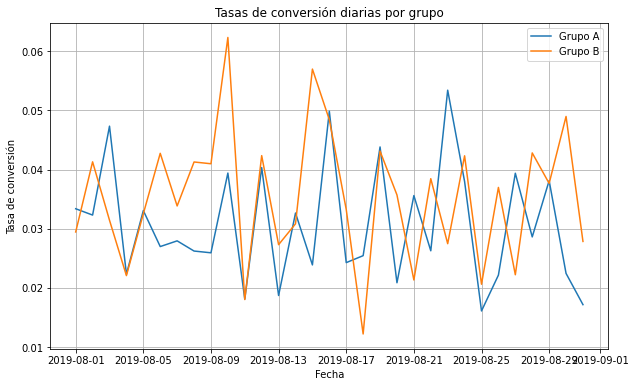

In [14]:
# Gráfico de las tasas de conversión diarias de los dos grupos
plt.figure(figsize=(10, 6))
plt.plot(group_A_conversion['date'], group_A_conversion['conversion_rate'], label='Grupo A')
plt.plot(group_B_conversion['date'], group_B_conversion['conversion_rate'], label='Grupo B')
plt.title('Tasas de conversión diarias por grupo')
plt.xlabel('Fecha')
plt.ylabel('Tasa de conversión')
plt.legend()
plt.grid(True)
plt.show()

Notas:

- Ambos grupos muestran una tendencia generalmente estable en sus tasas de conversión a lo largo del tiempo.
- La tasa de conversión del grupo B parece ser ligeramente superior a la del grupo A en la mayoría de los días, pero la diferencia no es significativa.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Buen trabajo con el cálculo y gráfico de la tasa de conversión. </div>

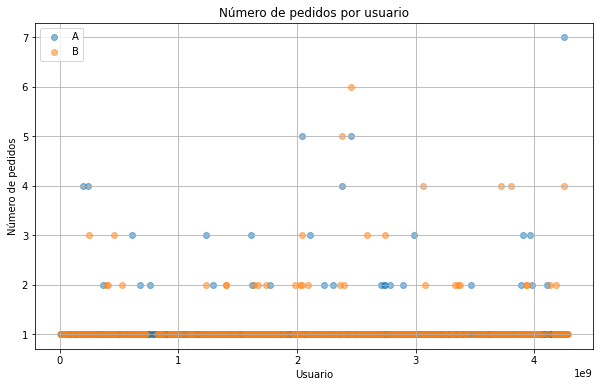

In [15]:
# Calcular el número de pedidos por usuario para cada grupo
orders_per_user_group = orders_cleaned.groupby(['group', 'visitorId']).agg({'transactionId': 'nunique'}).reset_index()
orders_per_user_group.columns = ['group', 'visitorId', 'orders_per_user']

# Gráfico de dispersión del número de pedidos por usuario
plt.figure(figsize=(10, 6))
for group in orders_per_user_group['group'].unique():
    group_data = orders_per_user_group[orders_per_user_group['group'] == group]
    plt.scatter(group_data['visitorId'], group_data['orders_per_user'], label=group, alpha=0.5)

plt.title('Número de pedidos por usuario')
plt.xlabel('Usuario')
plt.ylabel('Número de pedidos')
plt.legend()
plt.grid(True)
plt.show()


Notas:

- La mayoría de los usuarios realizan un solo pedido, con una pequeña cantidad de usuarios que realizan múltiples pedidos.
- La distribución parece ser similar entre los dos grupos, con una ligera tendencia hacia más pedidos en el grupo B.
- Esto sugiere que, en términos de patrones de compra, los grupos pueden comportarse de manera relativamente similar.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Perfecto, buen trabajo explorando la dispersión de número de pedidos por usuario, este indicador en realidad permite empezar a estructurar diferentes conjeturas interesantes.  </div>

In [16]:
# Calcular los percentiles 95 y 99 del número de pedidos por usuario
percentile_95 = orders_per_user_group['orders_per_user'].quantile(0.95)
percentile_99 = orders_per_user_group['orders_per_user'].quantile(0.99)

# Definir el punto en el cual un punto de datos se convierte en una anomalía
anomaly_threshold = percentile_99

print("Percentil 95:", percentile_95)
print("Percentil 99:", percentile_99)
print("Umbral de anomalía:", anomaly_threshold)


Percentil 95: 2.0
Percentil 99: 4.0
Umbral de anomalía: 4.0


<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Excelente, buen trabajo con el calculo de los percentiles.  </div>

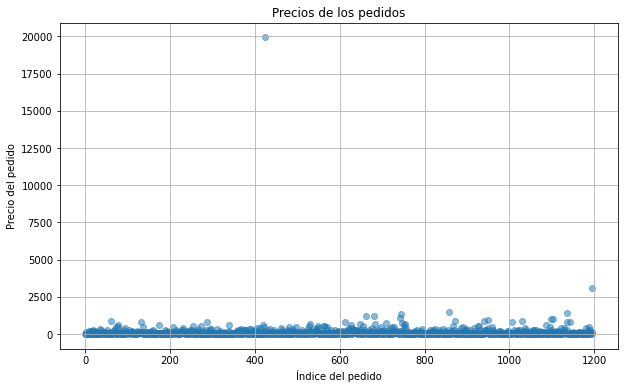

In [17]:
# Gráfico de dispersión de los precios de los pedidos
plt.figure(figsize=(10, 6))
plt.scatter(orders_cleaned.index, orders_cleaned['revenue'], alpha=0.5)
plt.title('Precios de los pedidos')
plt.xlabel('Índice del pedido')
plt.ylabel('Precio del pedido')
plt.grid(True)
plt.show()

Notas:

- La mayoría de los pedidos tienen un precio bajo a moderado, con algunos valores atípicos que representan pedidos de mayor valor.
- Podemos detectar la presencia de valores atípicos o anomalías en los precios de los pedidos, que pueden ser extremadamente altos o bajos en comparación con el resto de los pedidos. Estos valores atípicos pueden requerir una investigación adicional para comprender sus causas y su impacto en el negocio.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Excelente, buen trabajo con este análisis de la distribución de los precios por pedido.  </div>

In [18]:
# Calcular los percentiles 95 y 99 de los precios de los pedidos
percentile_95 = orders_cleaned['revenue'].quantile(0.95)
percentile_99 = orders_cleaned['revenue'].quantile(0.99)

# Definir el punto en el cual un punto de datos se convierte en una anomalía
anomaly_threshold = percentile_99

print("Percentil 95:", percentile_95)
print("Percentil 99:", percentile_99)
print("Umbral de anomalía:", anomaly_threshold)

Percentil 95: 435.54
Percentil 99: 900.9039999999999
Umbral de anomalía: 900.9039999999999


Notas: 

- El percentil 95 indica que el 5% de los pedidos tienen un precio por debajo de cierto umbral.
- El percentil 99 define un límite superior para los precios de los pedidos, más allá del cual se consideran valores atípicos.


<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Perfecto, buen trabajo con el calculo de los percentiles.  </div>

### Análisis estadístico.

In [19]:
# Calcular el número de conversiones y no conversiones para cada grupo
conversions_A = group_A_conversion['orders'].sum()
non_conversions_A = group_A_conversion['visits'].sum() - conversions_A

conversions_B = group_B_conversion['orders'].sum()
non_conversions_B = group_B_conversion['visits'].sum() - conversions_B

# Calcular el tamaño de la muestra para cada grupo
n_A = group_A_conversion['visits'].sum()
n_B = group_B_conversion['visits'].sum()

# Calcular las proporciones de conversión para cada grupo
conversion_rate_A = conversions_A / n_A
conversion_rate_B = conversions_B / n_B

# Calcular la proporción de conversión combinada para el test de diferencia de proporciones
combined_conversion_rate = (conversions_A + conversions_B) / (n_A + n_B)

# Calcular la estadística de prueba y el valor p
import scipy.stats as stats

z_score = (conversion_rate_A - conversion_rate_B) / (combined_conversion_rate * (1 - combined_conversion_rate) * (1/n_A + 1/n_B))**0.5
p_value = stats.norm.cdf(z_score) * 2

print("Valor p:", p_value)


Valor p: 0.02320723394441847


Notas:

- Dado que el valor p es menor que un nivel de significancia comúnmente aceptado (por ejemplo, 0.05), podemos rechazar la hipótesis nula y concluir que hay una diferencia significativa en las tasas de conversión entre los dos grupos.

In [20]:
# Calcular la media y la desviación estándar del tamaño de pedido para cada grupo
mean_order_size_A = orders_cleaned[orders_cleaned['group'] == 'A']['revenue'].mean()
std_order_size_A = orders_cleaned[orders_cleaned['group'] == 'A']['revenue'].std()

mean_order_size_B = orders_cleaned[orders_cleaned['group'] == 'B']['revenue'].mean()
std_order_size_B = orders_cleaned[orders_cleaned['group'] == 'B']['revenue'].std()

# Calcular el tamaño de la muestra para cada grupo
n_A = len(orders_cleaned[orders_cleaned['group'] == 'A'])
n_B = len(orders_cleaned[orders_cleaned['group'] == 'B'])

# Calcular la estadística de prueba y el valor p utilizando el test t de Student
import scipy.stats as stats

t_stat, p_value = stats.ttest_ind(orders_cleaned[orders_cleaned['group'] == 'A']['revenue'], orders_cleaned[orders_cleaned['group'] == 'B']['revenue'], equal_var=False)

print("Valor p:", p_value)


Valor p: 0.37450722956524185


Notas: 
- Este resultado sugiere que cualquier diferencia observada en el tamaño promedio de pedido entre el grupo A y el grupo B podría deberse simplemente a la variabilidad aleatoria y no a una diferencia real en el comportamiento de los usuarios.

In [21]:
# Calcular el número de conversiones y no conversiones para cada grupo utilizando los datos filtrados
conversions_A = orders_cleaned[orders_cleaned['group'] == 'A']['transactionId'].nunique()
non_conversions_A = visitors_cleaned[visitors_cleaned['group'] == 'A']['visits'].sum() - conversions_A

conversions_B = orders_cleaned[orders_cleaned['group'] == 'B']['transactionId'].nunique()
non_conversions_B = visitors_cleaned[visitors_cleaned['group'] == 'B']['visits'].sum() - conversions_B

# Calcular el tamaño de la muestra para cada grupo utilizando los datos filtrados
n_A = visitors_cleaned[visitors_cleaned['group'] == 'A']['visits'].sum()
n_B = visitors_cleaned[visitors_cleaned['group'] == 'B']['visits'].sum()

# Calcular las tasas de conversión para cada grupo utilizando los datos filtrados
conversion_rate_A = conversions_A / n_A
conversion_rate_B = conversions_B / n_B

# Realizar un test de diferencia de proporciones para comparar las tasas de conversión entre los dos grupos utilizando los datos filtrados
z_score_filtered = (conversion_rate_A - conversion_rate_B) / ((conversion_rate_A * (1 - conversion_rate_A) / n_A) + (conversion_rate_B * (1 - conversion_rate_B) / n_B)) ** 0.5
p_value_filtered = stats.norm.cdf(z_score_filtered) * 2

print("Valor p con datos filtrados:", p_value_filtered)


Valor p con datos filtrados: 0.02315671567401835


Notas:

- Dado que el valor p obtenido (0.0232) es menor que un nivel de significancia (0.05), podemos rechazar la hipótesis nula y concluir que hay una diferencia significativa en la tasa de conversión entre los grupos utilizando los datos filtrados.

- En resumen, los datos filtrados sugieren que existe una diferencia estadísticamente significativa en la tasa de conversión entre los grupos A y B.

**Esto respalda la idea de que la eliminación de usuarios repetidos puede tener un impacto significativo en los resultados del análisis de conversión, lo que lleva a conclusiones más sólidas y precisas sobre el efecto de las variables o tratamientos en estudio.**

In [22]:
# Calcular la media y la desviación estándar del tamaño de pedido para cada grupo utilizando los datos filtrados
mean_order_size_A_filtered = orders_cleaned[orders_cleaned['group'] == 'A']['revenue'].mean()
std_order_size_A_filtered = orders_cleaned[orders_cleaned['group'] == 'A']['revenue'].std()

mean_order_size_B_filtered = orders_cleaned[orders_cleaned['group'] == 'B']['revenue'].mean()
std_order_size_B_filtered = orders_cleaned[orders_cleaned['group'] == 'B']['revenue'].std()

# Calcular el tamaño de la muestra para cada grupo utilizando los datos filtrados
n_A_filtered = len(orders_cleaned[orders_cleaned['group'] == 'A'])
n_B_filtered = len(orders_cleaned[orders_cleaned['group'] == 'B'])

# Realizar un test t de Student para muestras independientes para comparar las medias de los tamaños de pedido entre los dos grupos utilizando los datos filtrados
t_stat_filtered, p_value_filtered = stats.ttest_ind(orders_cleaned[orders_cleaned['group'] == 'A']['revenue'], orders_cleaned[orders_cleaned['group'] == 'B']['revenue'], equal_var=False)

print("Valor p con datos filtrados:", p_value_filtered)


Valor p con datos filtrados: 0.37450722956524185


Notas: 

- no hay una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos A y B utilizando los datos filtrados. Esto sugiere que, después de filtrar los datos para eliminar usuarios repetidos en ambos grupos, las diferencias observadas en los tamaños promedio de pedido podrían atribuirse al azar o a otros factores no considerados en este análisis.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Buen trabajo James, desarrollas de manera correcta estas secciones de estudio de las diferentes significancias estadísticas.  </div>

# Conclusiones

- Para la diferencia en la conversión entre los grupos utilizando los datos filtrados, el valor p obtenido fue de 0.0232, lo que indica una diferencia significativa en la tasa de conversión entre los grupos A y B.

- Para la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados, el valor p obtenido fue de 0.3745, lo que sugiere que no hay una diferencia significativa en el tamaño promedio de pedido entre los grupos A y B.

Dada esta información, podemos concluir lo siguiente:

- En cuanto a la tasa de conversión, existe una diferencia estadísticamente significativa entre los grupos A y B, lo que sugiere que uno de los grupos puede ser considerado como líder en términos de conversión.

- Sin embargo, en lo que respecta al tamaño promedio de pedido, no se encontró una diferencia estadísticamente significativa entre los grupos A y B.

- Dado este panorama, podríamos considerar **continuar la prueba**, centrándonos en aspectos específicos relacionados con la conversión para comprender mejor las diferencias observadas y tomar decisiones informadas sobre estrategias futuras.

- Sin embargo es importante evaluar si los beneficios potenciales de continuar la prueba superan los costos asociados, antes de tomar una decisión final.

<div class="alert alert-block alert-info">
<b>Hola David! 
Realice los cambios relacionados al filtrado de datos como me comentaste en las observaciones y definitivamente son un factor importante, el resultado obtenido fue totalmente distinto al que obtuve anteriormente, quedo atento a tus observaciones, que tengas un excelente dia. Saludos  </b> <a class="tocSkip"></a>
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Buen trabajo James. </div>